# Exploring Visualizations for the Medicare Part D Data

We're going to explore the Medicare Part D data using the VA classifications to find out what the most prescribed drug classes are and what the most expensive drug classes are, then we can go from there.

### Imports

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

### The Data

We're going to need the Medicare Part D data. Let's start just with one year, the last one:

In [2]:
partd = pd.read_csv('https://query.data.world/s/do73dnhtplgxpfdb9j0y11mzg')

In [3]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome
0,0,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891
1,1,1ST TIER UNIFINE PENTIPS PLUS,"PEN NEEDLE, DIABETIC",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776
2,2,ABACAVIR,ABACAVIR SULFATE,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343
3,3,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428
4,4,ABELCET,AMPHOTERICIN B LIPID COMPLEX,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000


Let's make the drug names lowercase:

In [4]:
partd.drugname_brand = partd.drugname_brand.str.lower()

In [5]:
partd.drugname_generic = partd.drugname_generic.str.lower()

In [6]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome
0,0,1st tier unifine pentips,"pen needle, diabetic",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891
1,1,1st tier unifine pentips plus,"pen needle, diabetic",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776
2,2,abacavir,abacavir sulfate,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343
3,3,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428
4,4,abelcet,amphotericin b lipid complex,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000


Let's load the drug uses. There are some that we got from `data.world`, there's also the VA classification. Let's look at the VA classification, which we have already associated with drug names (they currently live locally):

In [151]:
druguse = pd.read_csv("../../data/drugnames_withclasses.csv", sep="\t")

In [172]:
druguse

,#drugname_brand,drugname_generic,RXCUI,drug_major_class,dmc_string,drug_class,dc_string,dmc_name,dc_name
0,10 wash,sulfacetamide sodium,10169,0|DE000|OP000,NaN,0|DE101|OP210,NaN,UNKNOWN/MISSING|DERMATOLOGICAL AGENTS|OPHTHALM...,"UNKNOWN/MISSING|ANTI-INFECTIVE,TOPICAL|ANTI-IN..."
1,1st tier unifine pentips,"pen needle, diabetic",0.0,0,NaN,0,NaN,UNKNOWN/MISSING,UNKNOWN/MISSING
2,1st tier unifine pentips plus,"pen needle, diabetic",0.0,0,NaN,0,NaN,UNKNOWN/MISSING,UNKNOWN/MISSING
3,60pse-400gfn-20dm,guaifenesin/dm/pseudoephedrine,5032|8896,RE000,NaN,RE200|RE302,NaN,RESPIRATORY TRACT MEDICATIONS,"DECONGESTANTS,SYSTEMIC|ANTITUSSIVES/EXPECTORANTS"
4,8-mop,methoxsalen,6854|227713,DE000,NaN,DE810,NaN,DERMATOLOGICAL AGENTS,ANTIPSORIATIC
5,a-b otic,antipyrine/benzocaine,1399,NT000|OT000,NaN,NT300|OT400,NaN,"NASAL AND THROAT AGENTS,TOPICAL|OTIC AGENTS","ANESTHETICS,MUCOSAL|ANALGESICS,TOPICAL OTIC"
6,abacavir,abacavir sulfate,190521|190521,AM000,NaN,AM800,NaN,ANTIMICROBIALS,ANTIVIRALS
7,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,190521|68244|11413,AM000,NaN,AM800,NaN,ANTIMICROBIALS,ANTIVIRALS
8,abelcet,amphotericin b lipid complex,81507,0,NaN,0,NaN,0,0
9,abilify,aripiprazole,89013|352393,CN000,NaN,CN709,NaN,CENTRAL NERVOUS SYSTEM MEDICATIONS,ANTIPSYCHOTICS


Let's make empty columns for the drug major and minor classes and their names:

In [153]:
partd["drug_major_class"] = ""
partd["drug_class"] = ""
partd["dmc_name"] = ""
partd["dc_name"] = ""

In [154]:
for idx in partd.index:
    r = partd.loc[idx]
    druguse_loc = druguse[druguse["#drugname_brand"] == r.drugname_brand].index
    partd.loc[idx, "drug_major_class"] = druguse.loc[druguse_loc[0], "drug_major_class"]
    partd.loc[idx, "drug_class"] = druguse.loc[druguse_loc[0], "drug_class"]
    partd.loc[idx, "dmc_name"] = druguse.loc[druguse_loc[0], "dmc_name"]
    partd.loc[idx, "dc_name"] = druguse.loc[druguse_loc[0], "dc_name"]

In [155]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome,drug_major_class,drug_class,dmc_name,dc_name
0,0,1st tier unifine pentips,"pen needle, diabetic",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
1,1,1st tier unifine pentips plus,"pen needle, diabetic",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
2,2,abacavir,abacavir sulfate,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
3,3,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
4,4,abelcet,amphotericin b lipid complex,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000,0,0,0,0


Ok, cool! Let's try to take one particular class of drugs and look at that. 

In [156]:
d = partd[partd["dmc_name"] == "ANTIMICROBIALS"]

In [157]:
d.sum(axis=0)

Unnamed: 0                                                                    361002
drugname_brand                     abacavirabacavir-lamivudine-zidovudineaczonead...
drugname_generic                   abacavir sulfateabacavir/lamivudine/zidovudine...
claim_count                                                                 32796792
total_spending                                                             5.604e+09
user_count                                                               1.90962e+07
total_spending_per_user                                                       573654
unit_count                                                               1.06532e+09
unit_cost_wavg                                                               3432.53
user_count_non_lowincome                                                 1.18441e+07
out_of_pocket_avg_non_lowincome                                              60351.9
user_count_lowincome                                             

In [158]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome,drug_major_class,drug_class,dmc_name,dc_name
0,0,1st tier unifine pentips,"pen needle, diabetic",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
1,1,1st tier unifine pentips plus,"pen needle, diabetic",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
2,2,abacavir,abacavir sulfate,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
3,3,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
4,4,abelcet,amphotericin b lipid complex,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000,0,0,0,0


**Note**: That currently does not include any drugs that have **more than one string**. Let's fix that:

In [159]:
idx = 12
partd.loc[idx, "dmc_name"]


'UNKNOWN/MISSING|ANTIMICROBIALS|DERMATOLOGICAL AGENTS|GENITOURINARY MEDICATIONS'

In [160]:
partd.loc[idx]

Unnamed: 0                                                                        12
drugname_brand                                                                acanya
drugname_generic                                      clindamycin phos/benzoyl perox
claim_count                                                                      799
total_spending                                                                360521
user_count                                                                       452
total_spending_per_user                                                      797.612
unit_count                                                                     42010
unit_cost_wavg                                                               8.58179
user_count_non_lowincome                                                         302
out_of_pocket_avg_non_lowincome                                              110.996
user_count_lowincome                                             

## Cleaning up the Drug Data

**Caution**: This is quite hacky and should probably be fixed!

One of the main issue is that several drugs have multiple RxNorm IDs, which means that they might also have multiple drug classes associated with them. Which should we choose?

For now, we're going to be super hacky and just choose the first one (unless it's unknown/missing).

In [175]:
for idx in partd.index:
    dmc_name = partd.loc[idx, "dmc_name"]
    dsplit = dmc_name.split("|")
    if dsplit[0] != "UNKNOWN/MISSING" or len(dsplit) == 1:
        partd.loc[idx, "dmc_name"] = dsplit[0]
    else:
        partd.loc[idx, "dmc_name"] = dsplit[1]

## Matching the drugs to their drug classes in the Part D Data

In [176]:
claim_count = partd.groupby(by="dmc_name", as_index=False)["claim_count"].sum()
claim_count.set_index("dmc_name", drop=True, inplace=True)

In [177]:
claim_count

,claim_count
dmc_name,
0,79883523
"ANTIDOTES,DETERRENTS AND POISON CONTROL",597424
ANTIHISTAMINES,6435919
ANTIMICROBIALS,84737290
ANTINEOPLASTICS,6300490
ANTIPARASITICS,2350112
AUTONOMIC MEDICATIONS,9639042
BLOOD PRODUCTS/MODIFIERS/VOLUME EXPANDERS,33792891
CARDIOVASCULAR MEDICATIONS,470267041


In [178]:
total_spending = partd.groupby(by="dmc_name", as_index=False)["total_spending"].sum()
total_spending.set_index("dmc_name", drop=True, inplace=True)

user_count = partd.groupby(by="dmc_name", as_index=False)["user_count"].sum()
user_count.set_index("dmc_name", drop=True, inplace=True)

total_spending_per_user = partd.groupby(by="dmc_name", as_index=False)["total_spending_per_user"].mean()
total_spending_per_user.set_index("dmc_name", drop=True, inplace=True)

unit_count = partd.groupby(by="dmc_name", as_index=False)["unit_count"].sum()
unit_count.set_index("dmc_name", drop=True, inplace=True)

unit_cost_wavg = partd.groupby(by="dmc_name", as_index=False)["unit_cost_wavg"].mean()
unit_cost_wavg.set_index("dmc_name", drop=True, inplace=True)

user_count_non_lowincome = partd.groupby(by="dmc_name", as_index=False)["user_count_non_lowincome"].sum()
user_count_non_lowincome.set_index("dmc_name", drop=True, inplace=True)

out_of_pocket_avg_non_lowincome = partd.groupby(by="dmc_name", as_index=False)["out_of_pocket_avg_non_lowincome"].mean()
out_of_pocket_avg_non_lowincome.set_index("dmc_name", drop=True, inplace=True)

user_count_lowincome = partd.groupby(by="dmc_name", as_index=False)["user_count_lowincome"].sum()
user_count_lowincome.set_index("dmc_name", drop=True, inplace=True)

out_of_pocket_avg_lowincome = partd.groupby(by="dmc_name", as_index=False)["out_of_pocket_avg_lowincome"].mean()
out_of_pocket_avg_lowincome.set_index("dmc_name", drop=True, inplace=True)



In [179]:
claim_count.index.name = "dmc_name"

In [180]:
user_count_lowincome.head()

,user_count_lowincome
dmc_name,
0,8573645.0
"ANTIDOTES,DETERRENTS AND POISON CONTROL",149352.0
ANTIHISTAMINES,1152058.0
ANTIMICROBIALS,18732599.0
ANTINEOPLASTICS,357887.0


In [181]:
dfs = [claim_count,
       total_spending,
       user_count,
       total_spending_per_user,
       unit_count,
       unit_cost_wavg,
       user_count_non_lowincome,
       out_of_pocket_avg_non_lowincome, 
       user_count_lowincome, 
       out_of_pocket_avg_lowincome]

In [182]:
from functools import reduce
partd_grouped = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs)

Last step: let's remove the rows "0" and "UNKNOWN/MISSING" from the table:

In [193]:
partd_grouped = partd_grouped.drop(["0", "UNKNOWN/MISSING"])

In [197]:
partd_grouped

,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome
dmc_name,,,,,,,,,,
"ANTIDOTES,DETERRENTS AND POISON CONTROL",597424,3.315259e+08,228718.0,19500.197143,3.788590e+07,93.222918,79165.0,971.951272,149352.0,16.969592
ANTIHISTAMINES,6435919,1.409777e+08,2039623.0,327.812783,4.091644e+08,2.368796,887448.0,68.719766,1152058.0,4.822949
ANTIMICROBIALS,84737290,6.829379e+09,51985674.0,1987.000332,2.593541e+09,15.479560,33252312.0,225.134306,18732599.0,6.705091
ANTINEOPLASTICS,6300490,3.408084e+09,1477080.0,11416.427254,2.861639e+08,351.310883,1118851.0,882.492539,357887.0,25.220989
ANTIPARASITICS,2350112,4.384229e+08,705211.0,1916.125671,1.852337e+08,25.970199,416720.0,125.413762,288454.0,4.808811
AUTONOMIC MEDICATIONS,9639042,6.602443e+08,2716136.0,1661.904604,7.148826e+08,20.705055,1412399.0,147.814115,1303588.0,6.245196
BLOOD PRODUCTS/MODIFIERS/VOLUME EXPANDERS,33792891,1.367068e+09,6012762.0,15283.134605,1.652406e+09,416.088981,4090765.0,371.490240,1921944.0,14.459852
CARDIOVASCULAR MEDICATIONS,470267041,1.687932e+10,96374371.0,2748.872419,2.863201e+10,10.302842,65814460.0,251.929488,30559435.0,15.405636
CENTRAL NERVOUS SYSTEM MEDICATIONS,333097899,2.103363e+10,67457648.0,3119.439890,2.222708e+10,36.708159,36676166.0,320.658209,30780802.0,13.851367


### Which medications are claimed most often?


Let's have a look at which classes of medications have the most claims:

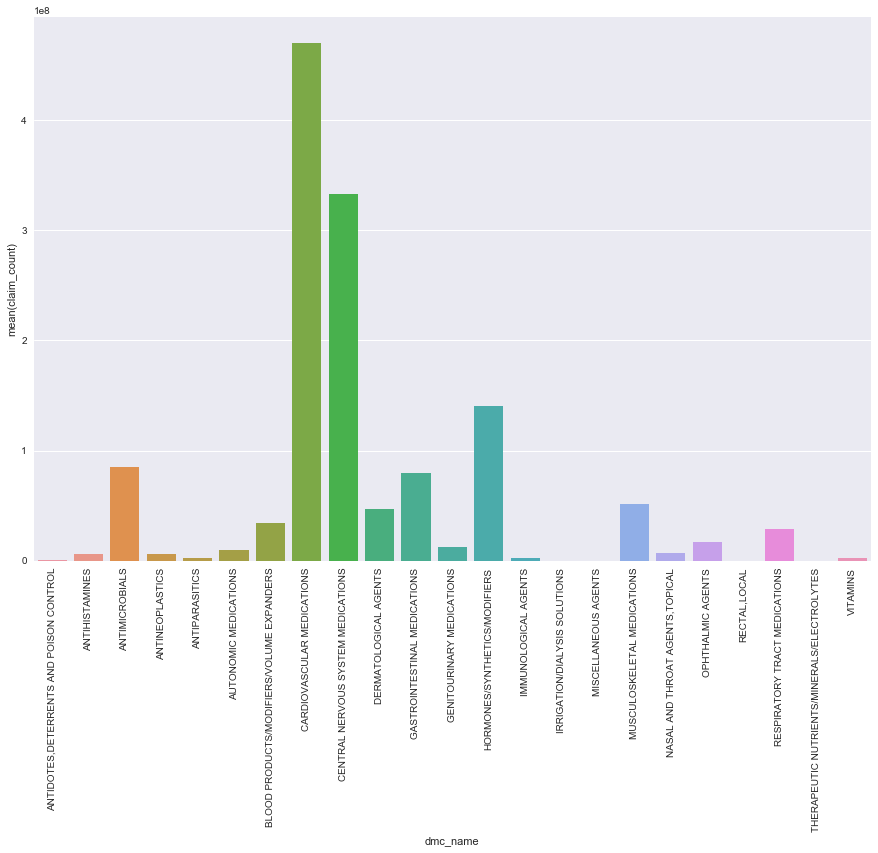

In [198]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.barplot(partd_grouped.index, partd_grouped["claim_count"], ax=ax)
plt.xticks(rotation=90);

In [199]:
claimed_count_top_ten = partd_grouped.sort_values("claim_count", ascending=False)["claim_count"][:10]
total_spending_top_ten = partd_grouped.sort_values("total_spending", ascending=False)["total_spending"][:10]

In [200]:
claimed_count_top_ten

dmc_name
CARDIOVASCULAR MEDICATIONS                   470267041
CENTRAL NERVOUS SYSTEM MEDICATIONS           333097899
HORMONES/SYNTHETICS/MODIFIERS                140385660
ANTIMICROBIALS                                84737290
GASTROINTESTINAL MEDICATIONS                  79329271
MUSCULOSKELETAL MEDICATIONS                   51355965
DERMATOLOGICAL AGENTS                         46531194
BLOOD PRODUCTS/MODIFIERS/VOLUME EXPANDERS     33792891
RESPIRATORY TRACT MEDICATIONS                 28612355
OPHTHALMIC AGENTS                             17364543
Name: claim_count, dtype: int64

let's compute the union of those two sets of categories:

In [318]:
top_ten_groups = np.unique(np.hstack([claimed_count_top_ten.index, total_spending_top_ten.index]))

In [319]:
current_palette = sns.color_palette('plasma', len(top_ten_groups))

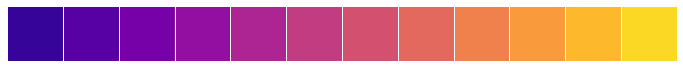

In [320]:
sns.palplot(current_palette)

In [321]:
np.where(top_ten_groups == claimed_count_top_ten.index[0])[0][0]

3

In [323]:
claimed_count_top_ten_colors = [tuple(np.hstack([list(current_palette[np.where(top_ten_groups == idx)[0][0]]), [1.0]])) for idx in claimed_count_top_ten.index]

In [324]:
claimed_count_top_ten_colors

[(0.57363200000000003, 0.060027999999999998, 0.63734900000000005, 1.0),
 (0.67452199999999995, 0.14741899999999999, 0.57868799999999998, 1.0),
 (0.89324999999999999, 0.41104800000000002, 0.36976799999999999, 1.0),
 (0.21435000000000001, 0.016972999999999999, 0.59923899999999997, 1.0),
 (0.83001800000000003, 0.32017200000000001, 0.437836, 1.0),
 (0.97923300000000002, 0.60753199999999996, 0.238013, 1.0),
 (0.76026400000000005, 0.23597599999999999, 0.50579399999999997, 1.0),
 (0.46555000000000002, 0.0045450000000000004, 0.66013900000000003, 1.0),
 (0.98119000000000001, 0.848329, 0.14227899999999999, 1.0),
 (0.99447399999999997, 0.72269099999999997, 0.17438100000000001, 1.0)]

In [325]:
total_spending_top_ten_colors = [tuple(np.hstack([current_palette[np.where(top_ten_groups == idx)[0][0]], [1.0]])) for idx in total_spending_top_ten.index]

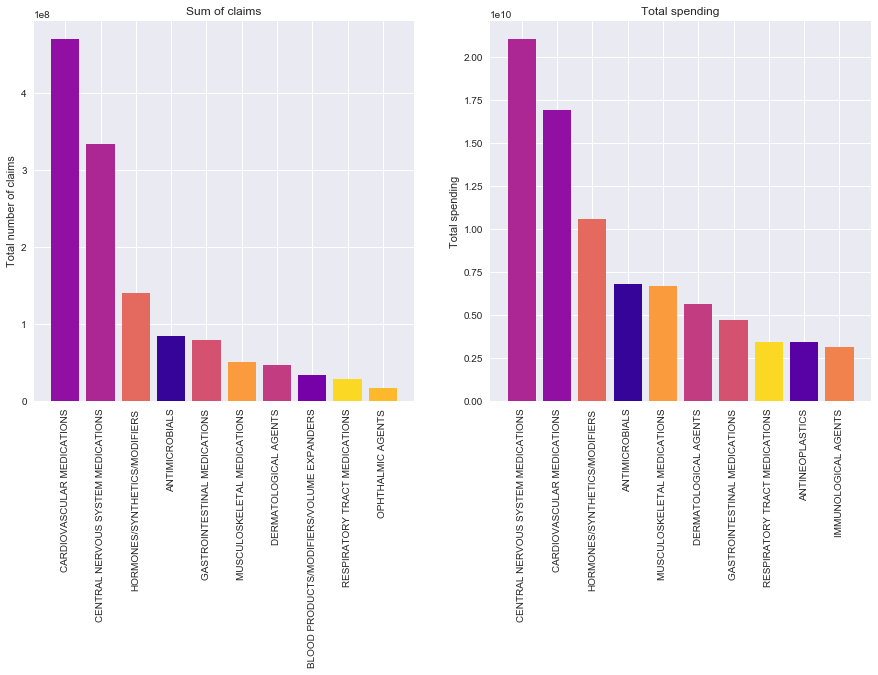

In [327]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.bar(np.arange(len(claimed_count_top_ten.index)), claimed_count_top_ten.values,
           color=claimed_count_top_ten_colors)

ax1.set_xticks(range(10))
xticklabels = claimed_count_top_ten.index
ax1.set_xticklabels(xticklabels, rotation=90)
ax1.set_title("Sum of claims")
ax1.set_ylabel("Total number of claims")

ax2.bar(np.arange(len(total_spending_top_ten.index)), total_spending_top_ten.values,
           color=total_spending_top_ten_colors)

ax2.set_xticks(range(10))
xticklabels = total_spending_top_ten.index
ax2.set_xticklabels(xticklabels, rotation=90)
ax2.set_title("Total spending")
ax2.set_ylabel("Total spending")

In [328]:
partd_grouped.columns

Index(['claim_count', 'total_spending', 'user_count',
       'total_spending_per_user', 'unit_count', 'unit_cost_wavg',
       'user_count_non_lowincome', 'out_of_pocket_avg_non_lowincome',
       'user_count_lowincome', 'out_of_pocket_avg_lowincome'],
      dtype='object')

What's the total spending per user?

In [332]:
total_spending_per_user_top_ten = partd_grouped.sort_values("total_spending_per_user", ascending=False)["total_spending_per_user"][:10]

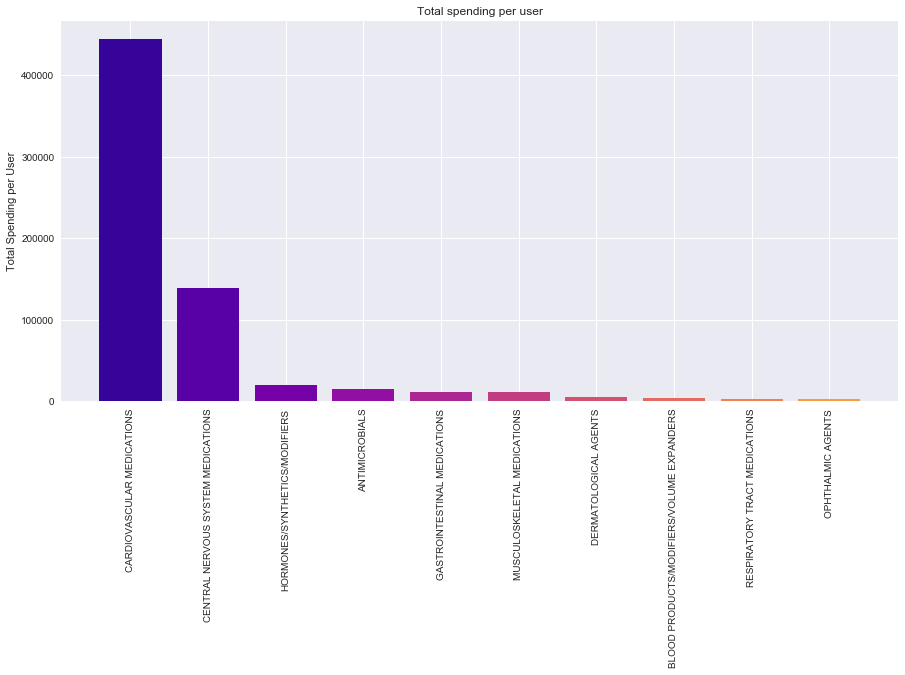

In [338]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,7))
ax1.bar(np.arange(len(total_spending_per_user_top_ten.index)), 
        total_spending_per_user_top_ten.values, color=current_palette)

ax1.set_xticks(range(10))
xticklabels = claimed_count_top_ten.index
ax1.set_xticklabels(xticklabels, rotation=90)
ax1.set_title("Total spending per user")
ax1.set_ylabel("Total Spending per User")

What's the price range of drugs in each category?

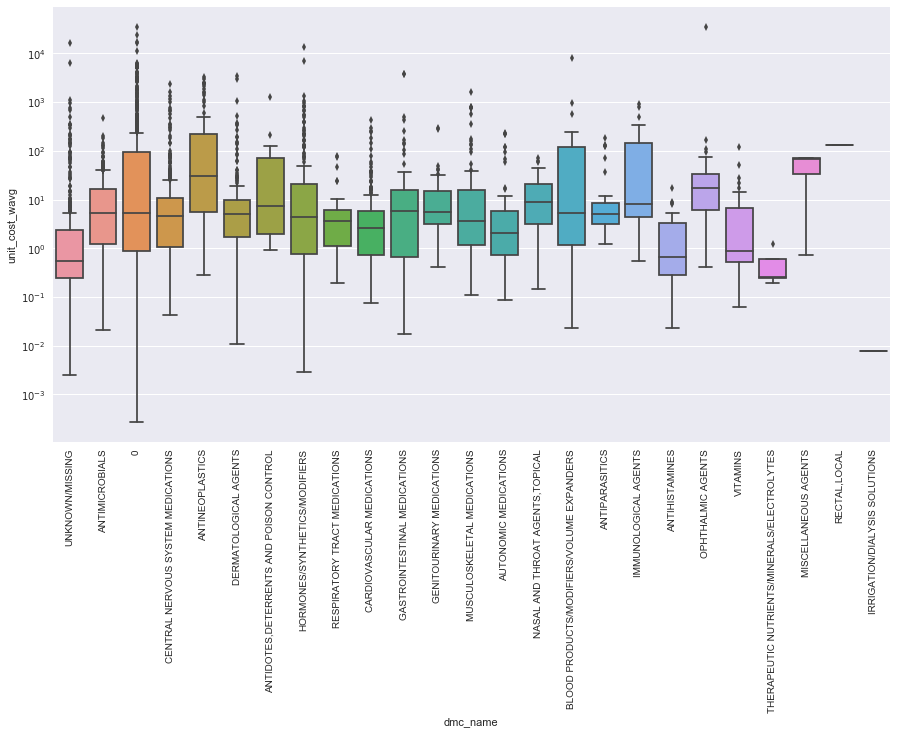

In [345]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

sns.boxplot(x="dmc_name", y="unit_cost_wavg", data=partd, ax=ax)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, rotation=90)
ax.set_yscale("log")

## Cardiovascular Medications

Let's take a closer look at the drugs in the category "cardiovascular medications", since they're the most-prescribed drugs. 

In [349]:
cs = partd[partd["dmc_name"] == "CARDIOVASCULAR MEDICATIONS"]

In [351]:
cs.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome,drug_major_class,drug_class,dmc_name,dc_name
15,15,accupril,quinapril hcl,5762,1129256.33,1089.0,1036.966327,3.875800e+05,2.913666,903.0,335.850853,186.0,33.892849,CV000,CV800,CARDIOVASCULAR MEDICATIONS,ACE INHIBITORS
16,16,accuretic,quinapril/hydrochlorothiazide,373,77105.43,91.0,847.312418,2.732000e+04,2.823054,72.0,333.760694,19.0,46.864737,CV000,CV701|CV800,CARDIOVASCULAR MEDICATIONS,DIURETICS|ACE INHIBITORS
17,17,acebutolol hcl,acebutolol hcl,124036,2755575.75,23590.0,116.811181,1.096829e+07,0.251665,20411.0,58.861067,3179.0,10.510862,CV000,CV100,CARDIOVASCULAR MEDICATIONS,BETA BLOCKERS/RELATED
20,20,acetazolamide,acetazolamide,300569,37170030.30,105306.0,352.971628,1.779603e+07,2.119760,70981.0,48.449797,34325.0,5.312822,CV000,CV703,CARDIOVASCULAR MEDICATIONS,DIURETICS
46,46,adalat cc,nifedipine,2285,271566.58,442.0,614.404027,1.302640e+05,2.105196,313.0,296.988914,129.0,28.219147,CV000,CV200,CARDIOVASCULAR MEDICATIONS,CALCIUM CHANNEL BLOCKERS


What are the top ten most prescribed drugs versus the most expensive and cheapest drugs?

In [359]:
claim_count_top_ten = cs.sort_values("claim_count", ascending=False)["claim_count"][:10]

In [360]:
claim_count_top_ten.index = cs.loc[claim_count_top_ten.index, "drugname_brand"]

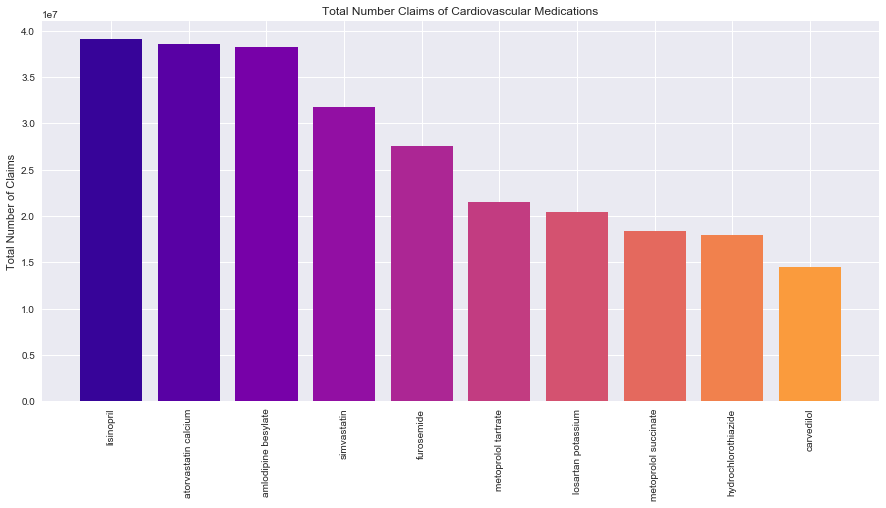

In [362]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,7))
ax1.bar(np.arange(len(claim_count_top_ten.index)), 
        claim_count_top_ten.values, color=current_palette)

ax1.set_xticks(range(10))
xticklabels = claim_count_top_ten.index
ax1.set_xticklabels(xticklabels, rotation=90)
ax1.set_title("Total Number Claims of Cardiovascular Medications")
ax1.set_ylabel("Total Number of Claims")

In [364]:
avg_cost_top_ten = cs.sort_values("unit_cost_wavg", ascending=False)["unit_cost_wavg"][:10]
avg_cost_top_ten.index = cs.loc[avg_cost_top_ten.index, "drugname_brand"]

avg_cost_bottom_ten = cs.sort_values("unit_cost_wavg", ascending=False)["unit_cost_wavg"][-10:]
avg_cost_bottom_ten.index = cs.loc[avg_cost_bottom_ten.index, "drugname_brand"]


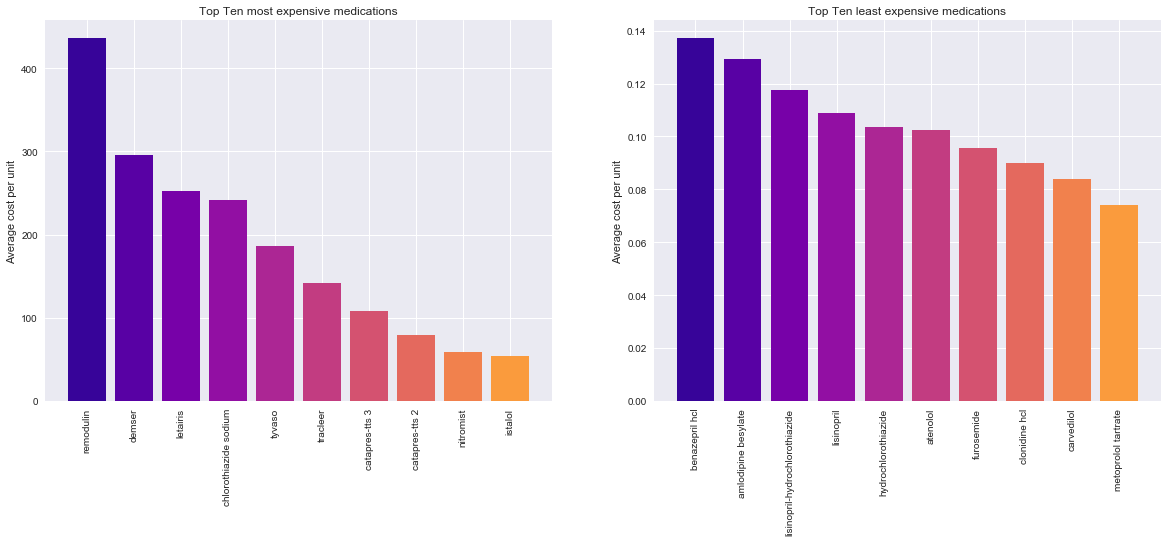

In [365]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.bar(np.arange(len(avg_cost_top_ten.index)), 
        avg_cost_top_ten.values, color=current_palette)

ax1.set_xticks(range(10))
xticklabels = avg_cost_top_ten.index
ax1.set_xticklabels(xticklabels, rotation=90)
ax1.set_title("Top Ten most expensive medications")
ax1.set_ylabel("Average cost per unit")

ax2.bar(np.arange(len(avg_cost_bottom_ten.index)), 
        avg_cost_bottom_ten.values, color=current_palette)

ax2.set_xticks(range(10))
xticklabels = avg_cost_bottom_ten.index
ax2.set_xticklabels(xticklabels, rotation=90)
ax2.set_title("Top Ten least expensive medications")
ax2.set_ylabel("Average cost per unit")

Where are the most prescribed drugs in the ranking of costs?

In [374]:
avg_cost = cs.sort_values("unit_cost_wavg", ascending=False)["unit_cost_wavg"]

In [376]:
avg_cost.index = cs.loc[avg_cost.index, "drugname_brand"]

In [377]:
avg_cost.head()

drugname_brand
remodulin                436.088908
demser                   296.327589
letairis                 252.659636
chlorothiazide sodium    241.761765
tyvaso                   186.270026
Name: unit_cost_wavg, dtype: float64

In [368]:
claim_count_top_ten.index

Index(['lisinopril', 'atorvastatin calcium', 'amlodipine besylate',
       'simvastatin', 'furosemide', 'metoprolol tartrate',
       'losartan potassium', 'metoprolol succinate', 'hydrochlorothiazide',
       'carvedilol'],
      dtype='object', name='drugname_brand')

In [384]:
idx_all = [np.where(avg_cost.index == idx)[0][0] for idx in claim_count_top_ten.index]

In [387]:
idx_all

[305, 269, 303, 301, 308, 311, 293, 250, 306, 310]

In [388]:
len(avg_cost)

312

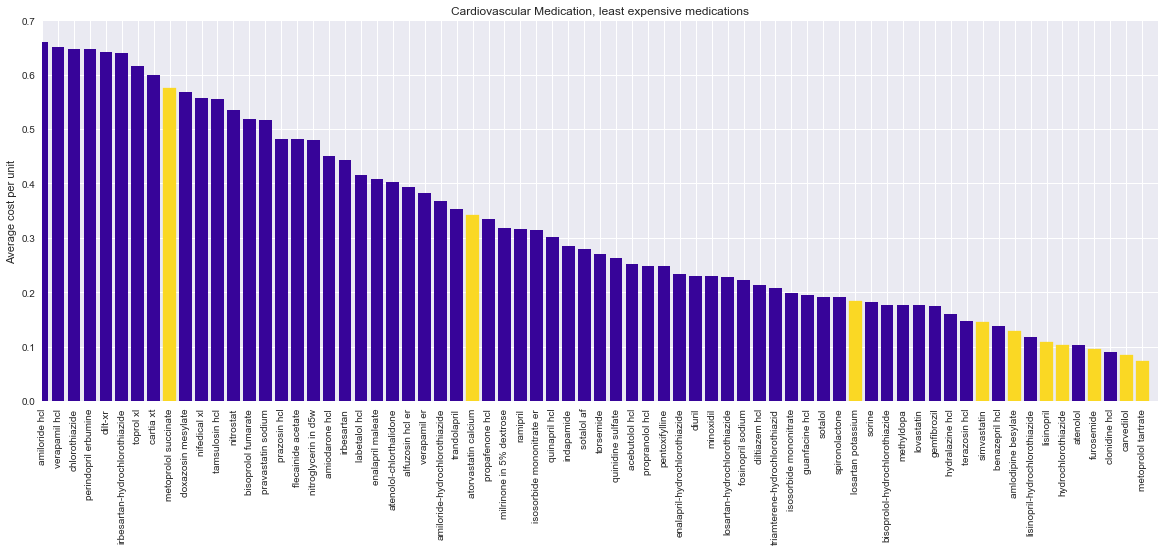

In [401]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,7))
barlist = ax1.bar(np.arange(len(avg_cost.index)), 
                  avg_cost.values, color=current_palette[0])

for idx in idx_all:
    barlist[idx].set_color(current_palette[-1])

    
ax1.set_xticks(range(len(avg_cost)))
ax1.set_xticklabels(avg_cost.index, rotation=90)
ax1.set_xlim(len(avg_cost)-70, len(avg_cost))

ax1.set_ylim(0,0.7)
ax1.set_title("Cardiovascular Medication, least expensive medications")
ax1.set_ylabel("Average cost per unit")

In [402]:
partd.columns

Index(['Unnamed: 0', 'drugname_brand', 'drugname_generic', 'claim_count',
       'total_spending', 'user_count', 'total_spending_per_user', 'unit_count',
       'unit_cost_wavg', 'user_count_non_lowincome',
       'out_of_pocket_avg_non_lowincome', 'user_count_lowincome',
       'out_of_pocket_avg_lowincome', 'drug_major_class', 'drug_class',
       'dmc_name', 'dc_name'],
      dtype='object')